In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder,RobustScaler,OrdinalEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/loan_data (1).csv")
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
x=df.drop('loan_status',axis=1)
y=df.loan_status

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=42)

In [ ]:
num_col=xtrain.select_dtypes(include='number').columns
cat_col=xtrain.select_dtypes(exclude='number').columns

<Axes: xlabel='loan_intent'>

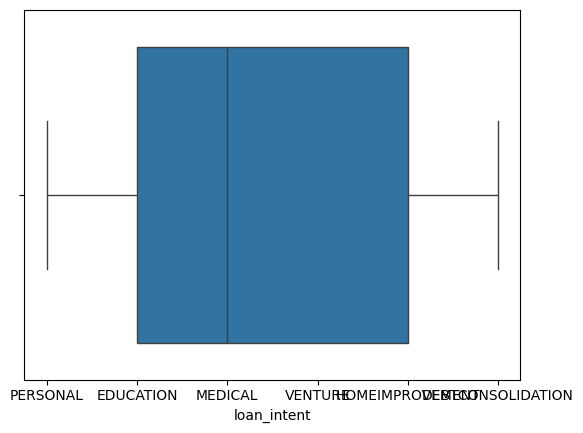

In [ ]:
sns.boxplot(df,x='loan_intent')

In [ ]:
def cat_cols_nunique(cols):
  for col in cols:
    print(f'{col}->{df[col].nunique()}')

In [ ]:
cat_cols_nunique(cat_col)

person_gender-2
person_education-5
person_home_ownership-4
loan_intent-6
previous_loan_defaults_on_file-2


In [ ]:
preprocessing=ColumnTransformer(
    transformers=[
        ('scaler',RobustScaler(),num_col),
        ('onehotencoder',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),cat_col.drop('person_education')),
        ('ordinalencoder',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),['person_education']),

    ]
)

In [ ]:
decisiontreepipeline=Pipeline(
    steps=[
        ('preprocessing',preprocessing),
        ('model',DecisionTreeClassifier())
    ]
)
decisiontreepipeline.fit(xtrain,ytrain)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score'],
      dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['person_gender', 'person_home_ownership', 'loan_intent',
       'previous_loan_defaults_on_file'],
      dtype='object')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['person_education'])])),
                ('model', DecisionTreeClassifier())])

In [ ]:
print("Train_score:",decisiontreepipeline.score(xtrain,ytrain))
print("Test_score:",decisiontreepipeline.score(xtest,ytest))

Train_score: 1.0
Test_score: 0.9024444444444445


In [ ]:
logisticpipeline=Pipeline(
    steps=[
        ('preprocessing',preprocessing),
        ('model',LogisticRegression())
    ]
)
logisticpipeline.fit(xtrain,ytrain)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score'],
      dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['person_gender', 'person_home_ownership', 'loan_intent',
       'previous_loan_defaults_on_file'],
      dtype='object')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['person_education'])])),
                ('model', LogisticRegression())])

In [ ]:
print("Train_score:",logisticpipeline.score(xtrain,ytrain))
print("Test_score:",logisticpipeline.score(xtest,ytest))

Train_score: 0.8973333333333333
Test_score: 0.8937777777777778


#DECISION TREE REGRRESION

In [ ]:
df=pd.read_csv("/content/Ice_cream selling data.csv")
df.head(2)

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120


In [ ]:
x=df.drop('Ice Cream Sales (units)',axis=1)
y=df['Ice Cream Sales (units)']

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=42)

In [ ]:
num_col=xtrain.select_dtypes(include='number').columns

In [ ]:
preprocessing=ColumnTransformer(
    transformers=[
        ('scaler',RobustScaler(),num_col),
    ]
)

In [ ]:
decisiontreepipeline=Pipeline(
    steps=[
        ('preprocessing',preprocessing),
        ('model',DecisionTreeRegressor())
    ]
)
decisiontreepipeline.fit(xtrain,ytrain)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  Index(['Temperature (°C)'], dtype='object'))])),
                ('model', DecisionTreeRegressor())])

In [ ]:
grid_search_cv=GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'model__C':[0.01,0.1,1.0,10],
                'model__penalty':['l1','l2'],
                'model__solver':['liblinear'],
                'model__class_weight':['balanced',None]
    },
    cv=10,
    n_jobs=-1,
    verbose=1,
    scoring='f1_macro'
)

In [ ]:
print("Train_score:",decisiontreepipeline.score(xtrain,ytrain))
print("Test_score:",decisiontreepipeline.score(xtest,ytest))

Train_score: 1.0
Test_score: 0.8148353325075832


#STDENT PERFORMANCE

In [ ]:
df=pd.read_excel("/content/Student_Performance (1).xlsx")
df.head(2)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65


In [ ]:
x=df.drop('Performance Index',axis=1)
y=df['Performance Index']

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=42)

In [ ]:
num_col=xtrain.select_dtypes(include='number').columns
cat_col=xtrain.select_dtypes(exclude='number').columns

In [ ]:
preprocessing=ColumnTransformer(
    transformers=[
        ('scaler',StandardScaler(),num_col),
        ('onehotencoder',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),cat_col),
    ]
)

In [ ]:
decisiontreepipeline=Pipeline(
    steps=[
        ('preprocessing',preprocessing),
        ('model',DecisionTreeRegressor())
    ]
)
decisiontreepipeline.fit(xtrain,ytrain)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced'],
      dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Extracurricular Activities'], dtype='object'))])),
                ('model', DecisionTreeRegressor())])

In [ ]:
print("Train_score:",decisiontreepipeline.score(xtrain,ytrain))
print("Test_score:",decisiontreepipeline.score(xtest,ytest))

Train_score: 0.9993046004930477
Test_score: 0.9763416174424975
